In [2]:
import Gadget as G
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from matplotlib.mlab import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition, mark_inset)
import numpy           as np
import math            as mt
import statistics      as st
import snap_blocks     as sb
import plots           as im
import plot_format     as pf
import global_fuctions as gf
import mpl_toolkits

In [3]:
# parameters 
v0      = 6.23e7
u0      = v0*v0
kB      = 1.38e-16
mp      = 1.67e-24
xNe     = 1.
nHe_fak = 3.
xH      = 0.76
yHe     = (1-xH)/(4*xH)
mu      = (1+4*yHe)/(1+nHe_fak*yHe+xNe)
T0      = mp*u0*mu/kB
rho0    = 4.03e-12
m0      = 6.97e39

In [4]:
mpl.style.use('classic')
font = {'family': 'sans-serif', 'size': 20, 'sans-serif': ['Helvetica']}
plt.rc('font', **font)
plt.rc('legend', **{'fontsize': 15}) 
plt.rcParams['axes.linewidth'] = 1.0
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.minor.size'] = 4
plt.rc('lines', linewidth=3)

In [5]:
def save_file(path,var,name,time):
    sfile = open(path+name,'a')
    sfile.write('{time:5d} {media:15.5e} {mediana:15.5e} {sigma:15.5e} \n'
          .format(time=time,media=var[0],mediana=var[1],sigma=var[2]))
    sfile.close()
    
def save_file2(path,var,name,time):
    sfile = open(path+name,'a')
    sfile.write('{time:5d} {media:15.5e} {mediana:15.5e} {sigma:15.5e} {per25:15.5e} {per75:15.5e} \n'
          .format(time=time,media=var[0],mediana=var[1],sigma=var[2],per25=var[3],per75=var[4]))
    sfile.close()    

In [9]:
#declaration of paths
path_main = '/home/meugenia/Documentos/discos/'
path_snap = path_main+'snaps/etacs/'
path_save = path_main +'plots/'
dir_txt   = 'regiones/disco/propiedades_vs_t/unidades_correctas/mc/'
pref = 'mc'
##snap = 'snapshot_000'
#ids, x,y,z,mass,rho,vx,vy,vz,bx,by,bz,vrms,hsml,eint = sb.reading_snap(path_snap,snap,0)
#ids_s,x_s,y_s,z_s,mass_s,rho_s,vx_s,vy_s,vz_s,bx_s,by_s,bz_s,vrms_s,hsml_s,eint_s = \
#sb.sorting_by_ids(ids,x,y,z,mass,rho,vx,vy,vz,bx,by,bz,vrms,hsml,eint)
#r=(x_s*x_s+y_s*y_s)**0.5

In [10]:
sindex=["000","001","002","003","004","005","006","007","008","009", 
        "010","020","030","040","050","060","070","080","090","100",
        "110","120","130","140","150","160","170","180","190","200",
        "210","220","230","240","250","260","270","280","290","300",
        "310","320","330","340","350","370"]

In [11]:
for sn in range(len(sindex)):
    #if sn!=0:
    #    continue
    snap = 'snapshot_'+sindex[sn]
    print snap
    ids, x,y,z,mass,rho,vx,vy,vz,bx,by,bz,vrms,hsml,eint = sb.reading_snap(path_snap,snap,0)
    ids_s,x_s,y_s,z_s,mass_s,rho_s,vx_s,vy_s,vz_s,bx_s,by_s,bz_s,vrms_s,hsml_s,eint_s = \
    sb.sorting_by_ids(ids,x,y,z,mass,rho,vx,vy,vz,bx,by,bz,vrms,hsml,eint)
    r=(x_s*x_s+y_s*y_s)**0.5
    
    limx    = [-10,10]
    limy    = [-10,10]
    #limz    = [-10,10] #mef
    limz    = [-1,1]   #mc
    limrho  = [0.0001,np.max(rho_s)]
    limeint = [0,0.015]
    limvrms = [-3,0]
    #limr    = [0,10]
    limr     = [2,7]  #mc
    
    
    sgvar = [x_s, y_s, z_s, r, rho_s, mass_s, vx_s, vy_s, vz_s, bx_s, by_s, bz_s, vrms_s, eint_s]
    
    #var   = [4,13]              #mef
    #vlims = [limrho,limeint]    #mef
    
    var   = [3,2]                #mc
    vlims = [limr,limz]          #mc
    
    for i in range(len(var)):
        #print vlims[i]
        if i==0:
            _sgvar=gf.sobgroup(sgvar,var[i],vlims[i])
            sgvar=_sgvar
            print var[i], _sgvar[var[i]][0].min(), _sgvar[var[i]][0].max()
        else:
            _sgvar=gf.sobgroup([sgvar[0][0],sgvar[1][0],sgvar[2][0],sgvar[3][0],sgvar[4][0],\
                               sgvar[5][0],sgvar[6][0],sgvar[7][0],sgvar[8][0],sgvar[9][0],\
                               sgvar[10][0],sgvar[11][0],sgvar[12][0],sgvar[13][0]], var[i],vlims[i])
            sgvar=_sgvar
            #print var[i], _sgvar[var[i]][0].min(), _sgvar[var[i]][0].max()
            
            
    sgx,sgy,sgz,sgr,sgrho,sgmass,sgvx,sgvy,sgvz,sgbx,sgby,sgbz,sgvrms,sgeint = gf.subgroup_all_wm(_sgvar)  
    
    
    sgbr   =  sgbx*np.cos(np.arctan2(sgy,sgx)) + sgby*np.sin(np.arctan2(sgy,sgx))
    sgbphi = -sgbx*np.sin(np.arctan2(sgy,sgx)) + sgby*np.cos(np.arctan2(sgy,sgx))
    
    sgemagr   = 0.125*(sgbr**2   )*sgmass/sgrho
    sgemagp   = 0.125*(sgbphi**2 )*sgmass/sgrho
    sgemagz   = 0.125*(sgbz**2   )*sgmass/sgrho
    
    bmodc     = sgbx**2+sgby**2+sgbz**2
    
    # correct units
    rho_   = sgrho*rho0
    ecin_  = 0.5*sgmass*v0**2*(sgvx**2+sgy**2+sgz**2)
    T_     = (5/float(3)-1)*sgeint*T0
    eint_  = sgeint*sgmass*m0*u0
    emag_  = 0.125/np.pi*bmodc*sgmass*m0/rho_
    etot_  = ecin_+eint_+emag_
        
    mediarho   ,medianarho   ,sigmarho   ,percentil25rho   ,percentil75rho   = st.internal_stat(rho_)
    mediaeint  ,medianaeint  ,sigmaeint  ,percentil25eint  ,percentil75eint  = st.internal_stat(eint_)
    mediavrms  ,medianavrms  ,sigmavrms  ,percentil25vrms  ,percentil75vrms  = st.internal_stat(sgvrms)
    mediabx    ,medianabx    ,sigmabx    ,percentil25bx    ,percentil75bx    = st.internal_stat(sgbx)
    mediaby    ,medianaby    ,sigmaby    ,percentil25by    ,percentil75by    = st.internal_stat(sgby)
    mediabz    ,medianabz    ,sigmabz    ,percentil25bz    ,percentil75bz    = st.internal_stat(sgbz)
    mediabr    ,medianabr    ,sigmabr    ,percentil25br    ,percentil75br    = st.internal_stat(sgbr)
    mediabphi  ,medianabphi  ,sigmabphi  ,percentil25bphi  ,percentil75bphi  = st.internal_stat(sgbphi)
    mediabzc   ,medianabzc   ,sigmabzc   ,percentil25bzc   ,percentil75bzc   = st.internal_stat(sgbz**2)
    mediabrc   ,medianabrc   ,sigmabrc   ,percentil25brc   ,percentil75brc   = st.internal_stat(sgbr**2)
    mediabphic ,medianabphic ,sigmabphic ,percentil25bphic ,percentil75bphic = st.internal_stat(sgbphi**2)
    mediabc    ,medianabc    ,sigmabc    ,percentil25bc    ,percentil75bc    = st.internal_stat(sgbz**2+sgbphi**2*sgbr**2)
    mediaemagz ,medianaemagz ,sigmaemagz ,percentil25emagz ,percentil75emagz = st.internal_stat(sgemagz)
    mediaemagr ,medianaemagr ,sigmaemagr ,percentil25emagr ,percentil75emagr = st.internal_stat(sgemagr)
    mediaemagp ,medianaemagp ,sigmaemagp ,percentil25emagp ,percentil75emagp = st.internal_stat(sgemagp)
        
    mediaecin ,medianaecin ,sigmaecin ,percentil25ecin ,percentil75ecin = st.internal_stat(ecin_)
    mediaT    ,medianaT    ,sigmaT    ,percentil25T    ,percentil75T    = st.internal_stat(T_)
    mediaemag ,medianaemag ,sigmaemag ,percentil25emag ,percentil75emag = st.internal_stat(emag_)
    mediaetot ,medianaetot ,sigmaetot ,percentil25etot ,percentil75etot = st.internal_stat(etot_)
        
    times=snap[9::]
    timei=int(times)
    print 'time: ', timei
    
    save_file2(path_main+dir_txt,[mediarho   ,  medianarho   ,  sigmarho  ,percentil25rho   ,percentil75rho  ],pref+'_evo_rho'  ,timei)
    save_file2(path_main+dir_txt,[mediaeint  ,  medianaeint  ,  sigmaeint ,percentil25eint  ,percentil75eint ],pref+'_evo_eint' ,timei)
    save_file2(path_main+dir_txt,[mediavrms  ,  medianavrms  ,  sigmavrms ,percentil25vrms  ,percentil75vrms ],pref+'_evo_vrms' ,timei)
    save_file2(path_main+dir_txt,[mediabx    ,  medianabx    ,  sigmabx   ,percentil25bx    ,percentil75bx   ],pref+'_evo_bx'   ,timei)
    save_file2(path_main+dir_txt,[mediaby    ,  medianaby    ,  sigmaby   ,percentil25by    ,percentil75by   ],pref+'_evo_by'   ,timei)
    save_file2(path_main+dir_txt,[mediabz    ,  medianabz    ,  sigmabz   ,percentil25bz    ,percentil75bz   ],pref+'_evo_bz'   ,timei)
    save_file2(path_main+dir_txt,[mediabr    ,  medianabr    ,  sigmabr   ,percentil25br    ,percentil75br   ],pref+'_evo_br'   ,timei)
    save_file2(path_main+dir_txt,[mediabphi  ,  medianabphi  ,  sigmabphi ,percentil25bphi  ,percentil75bphi ],pref+'_evo_bphi' ,timei)
    save_file2(path_main+dir_txt,[mediabzc   ,  medianabzc   ,  sigmabzc  ,percentil25bzc   ,percentil75bzc  ],pref+'_evo_bzc'  ,timei)
    save_file2(path_main+dir_txt,[mediabrc   ,  medianabrc   ,  sigmabrc  ,percentil25brc   ,percentil75brc  ],pref+'_evo_brc'  ,timei)
    save_file2(path_main+dir_txt,[mediabphic ,  medianabphic ,  sigmabphic,percentil25bphic ,percentil75bphic],pref+'_evo_bphic',timei)
    save_file2(path_main+dir_txt,[mediabc    ,  medianabc    ,  sigmabc   ,percentil25bc    ,percentil75bc   ],pref+'_evo_bc'   ,timei)
    save_file2(path_main+dir_txt,[mediaemagz ,  medianaemagz ,  sigmaemagz,percentil25emagz ,percentil75emagz],pref+'_evo_emagz',timei)
    save_file2(path_main+dir_txt,[mediaemagr ,  medianaemagr ,  sigmaemagr,percentil25emagr ,percentil75emagr],pref+'_evo_emagr',timei)
    save_file2(path_main+dir_txt,[mediaemagp ,  medianaemagp ,  sigmaemagp,percentil25emagp ,percentil75emagp],pref+'_evo_emagp',timei)    
    
    save_file2(path_main+dir_txt,[mediaecin  ,  medianaecin  ,  sigmaecin ,percentil25ecin  ,percentil75ecin] ,pref+'_evo_ecin',timei)
    save_file2(path_main+dir_txt,[mediaT     ,  medianaT     ,  sigmaT    ,percentil25T     ,percentil75T]    ,pref+'_evo_T'   ,timei)
    save_file2(path_main+dir_txt,[mediaemag  ,  medianaemag  ,  sigmaemag ,percentil25emag  ,percentil75emag] ,pref+'_evo_emag',timei)
    save_file2(path_main+dir_txt,[mediaetot  ,  medianaetot  ,  sigmaetot ,percentil25etot  ,percentil75etot] ,pref+'_evo_etot',timei)

    
    

snapshot_000
3 2.0000005 6.9999914
time:  0
snapshot_001
3 2.0000017 6.9999914
time:  1
snapshot_002
3 2.0000036 6.9999967
time:  2
snapshot_003
3 2.000002 6.9999804
time:  3
snapshot_004
3 2.0000021 6.9999933
time:  4
snapshot_005
3 2.0000196 6.999989
time:  5
snapshot_006
3 2.0000029 6.9999976
time:  6
snapshot_007
3 2.0000021 6.99997
time:  7
snapshot_008
3 2.0000005 6.99999
time:  8
snapshot_009
3 2.0000012 6.9999723
time:  9
snapshot_010
3 2.0000024 6.9999824
time:  10
snapshot_020
3 2.0000024 6.999991
time:  20
snapshot_030
3 2.0000038 6.9999676
time:  30
snapshot_040
3 2.000001 6.9999833
time:  40
snapshot_050
3 2.000001 6.999994
time:  50
snapshot_060
3 2.0000074 6.9999976
time:  60
snapshot_070
3 2.0000043 6.999977
time:  70
snapshot_080
3 2.0000057 6.9999785
time:  80
snapshot_090
3 2.0000143 6.9999933
time:  90
snapshot_100
3 2.0000002 6.9999733
time:  100
snapshot_110
3 2.0000002 6.9999785
time:  110
snapshot_120
3 2.0000002 6.99999
time:  120
snapshot_130
3 2.0000303 6.999

In [8]:
time = np.loadtxt(path_main+'/regiones/disco/propiedades_vs_t/evo_rho' , usecols=[0], unpack=True)
tmediarho   ,  tmedianarho   ,  tsigmarho  = np.loadtxt(path_main+'/regiones/disco/propiedades_vs_t/evo_rho' , usecols=[1,2,3], unpack=True)
tmediaeint  ,  tmedianaeint  ,  tsigmaeint = np.loadtxt(path_main+'/regiones/disco/propiedades_vs_t/evo_eint', usecols=[1,2,3], unpack=True)
tmediavrms  ,  tmedianavrms  ,  tsigmavrms = np.loadtxt(path_main+'/regiones/disco/propiedades_vs_t/evo_vrms', usecols=[1,2,3], unpack=True)
tmediabx    ,  tmedianabx    ,  tsigmabx   = np.loadtxt(path_main+'/regiones/disco/propiedades_vs_t/evo_bx'  , usecols=[1,2,3], unpack=True)
tmediaby    ,  tmedianaby    ,  tsigmaby   = np.loadtxt(path_main+'/regiones/disco/propiedades_vs_t/evo_by'  , usecols=[1,2,3], unpack=True)
tmediabz    ,  tmedianabz    ,  tsigmabz   = np.loadtxt(path_main+'/regiones/disco/propiedades_vs_t/evo_bz'  , usecols=[1,2,3], unpack=True)
tmediabr    ,  tmedianabr    ,  tsigmabr   = np.loadtxt(path_main+'/regiones/disco/propiedades_vs_t/evo_br'  , usecols=[1,2,3], unpack=True)
tmediabphi  ,  tmedianabphi  ,  tsigmabphi = np.loadtxt(path_main+'/regiones/disco/propiedades_vs_t/evo_bphi', usecols=[1,2,3], unpack=True)

In [17]:
time = np.loadtxt(path_main+'ln_evo_rho' , usecols=[0], unpack=True)
tmediarho   ,  tmedianarho   ,  tsigmarho  = np.loadtxt(path_main+'ln_evo_rho' , usecols=[1,2,3], unpack=True)
tmediaeint  ,  tmedianaeint  ,  tsigmaeint = np.loadtxt(path_main+'ln_evo_eint', usecols=[1,2,3], unpack=True)
tmediavrms  ,  tmedianavrms  ,  tsigmavrms = np.loadtxt(path_main+'ln_evo_vrms', usecols=[1,2,3], unpack=True)
tmediabx    ,  tmedianabx    ,  tsigmabx   = np.loadtxt(path_main+'ln_evo_bx'  , usecols=[1,2,3], unpack=True)
tmediaby    ,  tmedianaby    ,  tsigmaby   = np.loadtxt(path_main+'ln_evo_by'  , usecols=[1,2,3], unpack=True)
tmediabz    ,  tmedianabz    ,  tsigmabz   = np.loadtxt(path_main+'ln_evo_bz'  , usecols=[1,2,3], unpack=True)
tmediabr    ,  tmedianabr    ,  tsigmabr   = np.loadtxt(path_main+'ln_evo_br'  , usecols=[1,2,3], unpack=True)
tmediabphi  ,  tmedianabphi  ,  tsigmabphi = np.loadtxt(path_main+'ln_evo_bphi', usecols=[1,2,3], unpack=True)

In [18]:
c1='#FFBE3A' #naranja
c2='#4BACFF' #celeste
c3='#05A41A' #verde

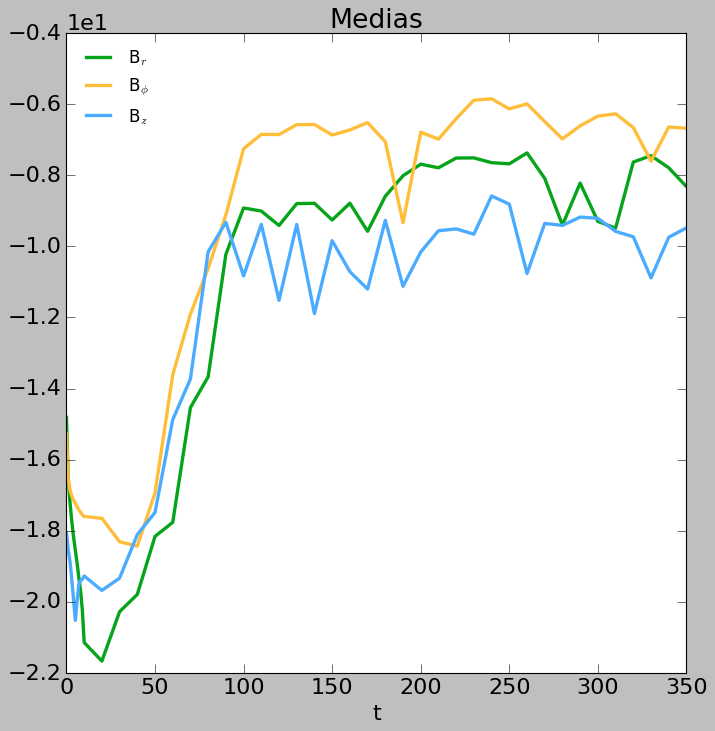

In [19]:
plt.figure(figsize=(10,10))
plt.plot(time,np.log10(tmediabr**2),label='B$_r$', color=c3)
#plt.fill_between(time,tmediabr**2-tsigmabr,tmediabr+tsigmabr,edgecolor=c3,hatch='//////',facecolor='none',alpha=0.5)
plt.plot(time,np.log10(tmediabphi**2),label=r'B$_{\phi}$', color=c1)
#plt.fill_between(time,tmediabphi-tsigmabphi,tmediabphi+tsigmabphi,edgecolor=c1,hatch='//////',facecolor='none',alpha=0.5)
plt.plot(time,np.log10(tmediabz**2),label='B$_z$',color=c2)
#plt.fill_between(time,tmediabz-tsigmabz,tmediabz+tsigmabz,edgecolor=c2,hatch='//////',facecolor='none',alpha=0.5)
plt.legend(loc='upper left', frameon=False)
plt.title('Medias')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlim(0,350)
plt.xlabel('t')
#plt.savefig(path_save+'disco/componentes_B_medias_vs_t.pdf', format='pdf', dpi=1500,bbox_inches='tight')
plt.show()

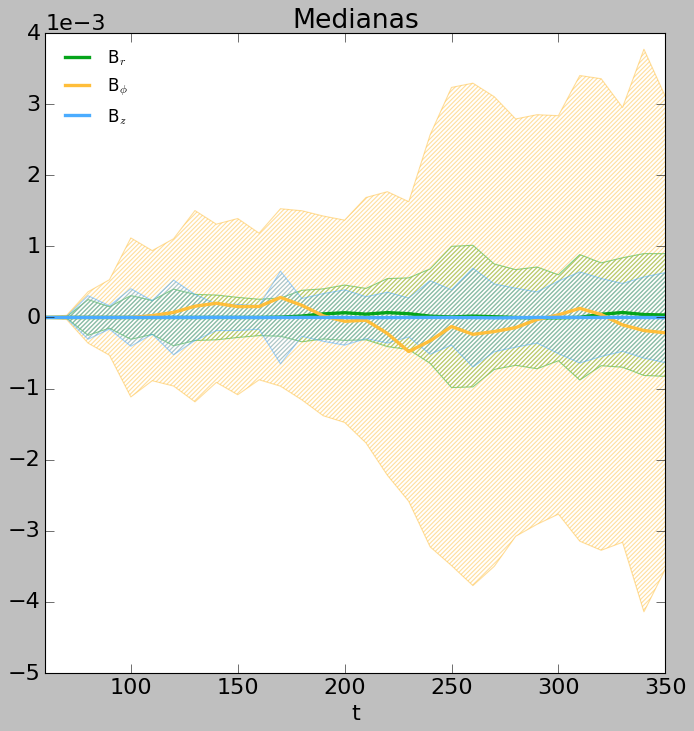

In [98]:
plt.figure(figsize=(10,10))
plt.plot(time,tmedianabr,label='B$_r$', color=c3)
plt.fill_between(time,tmedianabr-tsigmabr,tmedianabr+tsigmabr,edgecolor=c3,hatch='//////',facecolor='none',alpha=0.5)
plt.plot(time,tmedianabphi,label=r'B$_{\phi}$', color=c1)
plt.fill_between(time,tmedianabphi-tsigmabphi,tmedianabphi+tsigmabphi,edgecolor=c1,hatch='//////',facecolor='none',alpha=0.5)
plt.plot(time,tmedianabz,label='B$_z$',color=c2)
plt.fill_between(time,tmedianabz-tsigmabz,tmedianabz+tsigmabz,edgecolor=c2,hatch='//////',facecolor='none',alpha=0.5)
plt.legend(loc='upper left', frameon=False)
plt.title('Medianas')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlim(60,350)
plt.xlabel('t')
plt.savefig(path_save+'disco/componentes_B_medianas_vs_t.pdf', format='pdf', dpi=1500,bbox_inches='tight')
plt.show()

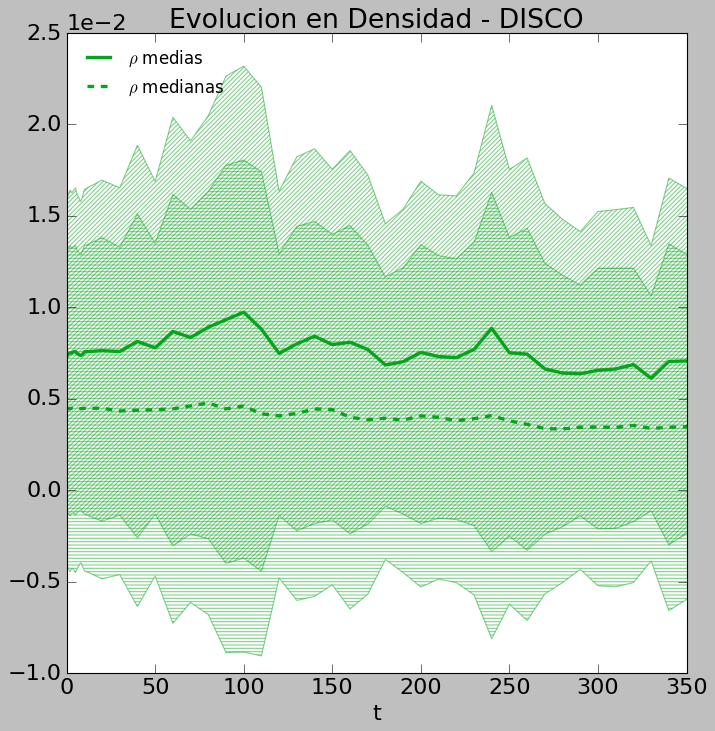

In [20]:
plt.figure(figsize=(10,10))
plt.plot(time,tmediarho,label=r'$\rho$ medias', color=c3)
plt.plot(time,tmedianarho,label=r'$\rho$ medianas', color=c3, ls='--')
plt.fill_between(time,tmediarho-tsigmarho,tmediarho+tsigmarho,edgecolor=c3,hatch='//////',facecolor='none',alpha=0.5)
plt.fill_between(time,tmedianarho-tsigmarho,tmedianarho+tsigmarho,edgecolor=c3,hatch='----',facecolor='none',alpha=0.5)
#plt.plot(time,tmediabphi,label=r'b$_{\phi}$', color=c1)
#plt.fill_between(time,tmediabphi-tsigmabphi,tmediabphi+tsigmabphi,edgecolor=c1,hatch='//////',facecolor='none',alpha=0.5)
#plt.plot(time,tmediabz,label='b$_z$',color=c2)
#plt.fill_between(time,tmediabz-tsigmabz,tmediabz+tsigmabz,edgecolor=c2,hatch='//////',facecolor='none',alpha=0.5)
plt.legend(loc='upper left', frameon=False)
plt.title('Evolucion en Densidad - DISCO')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlim(0,350)
plt.xlabel('t')
#plt.savefig(path_save+'disco/rho_vs_t.pdf', format='pdf', dpi=1500,bbox_inches='tight')
plt.show()

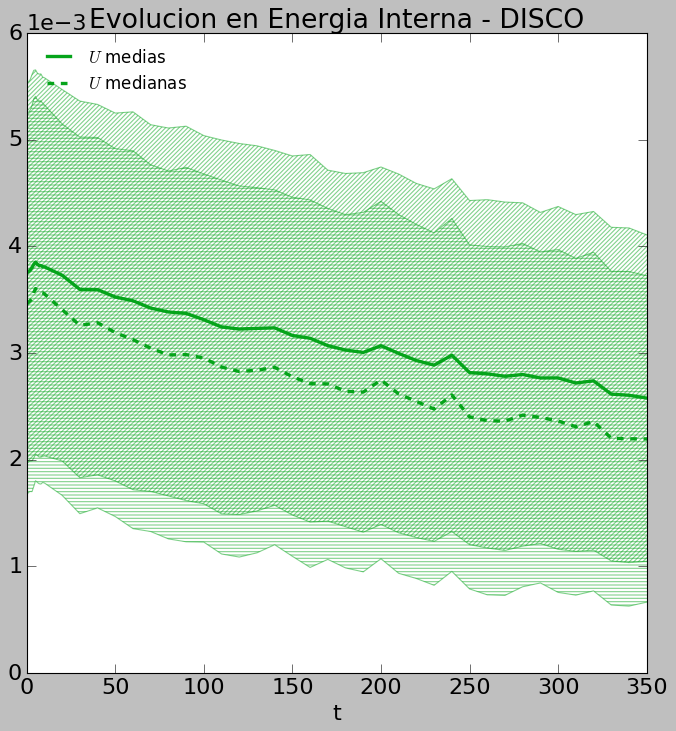

In [21]:
plt.figure(figsize=(10,10))
plt.plot(time,tmediaeint,label=r'$U$ medias', color=c3)
plt.plot(time,tmedianaeint,label=r'$U$ medianas', color=c3, ls='--')
plt.fill_between(time,tmediaeint-tsigmaeint,tmediaeint+tsigmaeint,edgecolor=c3,hatch='//////',facecolor='none',alpha=0.5)
plt.fill_between(time,tmedianaeint-tsigmaeint,tmedianaeint+tsigmaeint,edgecolor=c3,hatch='- - - -',facecolor='none',alpha=0.5)
#plt.plot(time,tmediabphi,label=r'b$_{\phi}$', color=c1)
#plt.fill_between(time,tmediabphi-tsigmabphi,tmediabphi+tsigmabphi,edgecolor=c1,hatch='//////',facecolor='none',alpha=0.5)
#plt.plot(time,tmediabz,label='b$_z$',color=c2)
#plt.fill_between(time,tmediabz-tsigmabz,tmediabz+tsigmabz,edgecolor=c2,hatch='//////',facecolor='none',alpha=0.5)
plt.legend(loc='upper left', frameon=False)
plt.title('Evolucion en Energia Interna - DISCO')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlim(0,350)
plt.xlabel('t')
#plt.savefig(path_save+'disco/u_vs_t.pdf', format='pdf', dpi=1500,bbox_inches='tight')
plt.show()

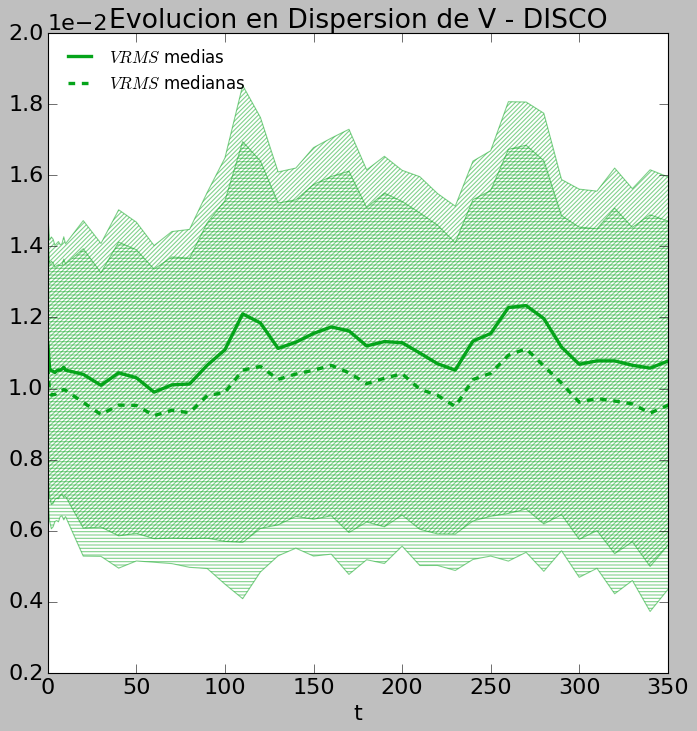

In [22]:
plt.figure(figsize=(10,10))
plt.plot(time,tmediavrms,label=r'$VRMS$ medias', color=c3)
plt.plot(time,tmedianavrms,label=r'$VRMS$ medianas', color=c3, ls='--')
plt.fill_between(time,tmediavrms-tsigmavrms,tmediavrms+tsigmavrms,edgecolor=c3,hatch='//////',facecolor='none',alpha=0.5)
plt.fill_between(time,tmedianavrms-tsigmavrms,tmedianavrms+tsigmavrms,edgecolor=c3,hatch='----',facecolor='none',alpha=0.5)
#plt.plot(time,tmediabphi,label=r'b$_{\phi}$', color=c1)
#plt.fill_between(time,tmediabphi-tsigmabphi,tmediabphi+tsigmabphi,edgecolor=c1,hatch='//////',facecolor='none',alpha=0.5)
#plt.plot(time,tmediabz,label='b$_z$',color=c2)
#plt.fill_between(time,tmediabz-tsigmabz,tmediabz+tsigmabz,edgecolor=c2,hatch='//////',facecolor='none',alpha=0.5)
plt.legend(loc='upper left', frameon=False)
plt.title('Evolucion en Dispersion de V - DISCO')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlim(0,350)
plt.xlabel('t')
#plt.savefig(path_save+'disco/vrms_vs_t.pdf', format='pdf', dpi=1500,bbox_inches='tight')
plt.show()

In [89]:
#con logaritmos

for sn in range(len(sindex)):
    #if sn!=0:
    #    continue
    snap = 'snapshot_'+sindex[sn]
    print snap
    ids, x,y,z,mass,rho,vx,vy,vz,bx,by,bz,vrms,hsml,eint = sb.reading_snap(path_snap,snap,0)
    ids_s,x_s,y_s,z_s,mass_s,rho_s,vx_s,vy_s,vz_s,bx_s,by_s,bz_s,vrms_s,hsml_s,eint_s = \
    sb.sorting_by_ids(ids,x,y,z,mass,rho,vx,vy,vz,bx,by,bz,vrms,hsml,eint)
    r=(x_s*x_s+y_s*y_s)**0.5
    
    limx    = [-10,10]
    limy    = [-10,10]
    limz    = [-3,3]
    limrho  = [0.00004,np.max(rho_s)]
    limeint = [0,0.015]
    limvrms = [-3,0]
    limr    = [0,10]
    
    sgvar = [x_s, y_s, z_s, r, rho_s, vx_s, vy_s, vz_s, bx_s, by_s, bz_s, vrms_s, eint_s]
    
    var   = [4,12]
    vlims = [limrho,limeint]
    
    for i in range(len(var)):
        #print vlims[i]
        if i==0:
            _sgvar=gf.sobgroup(sgvar,var[i],vlims[i])
            sgvar=_sgvar
            print var[i], _sgvar[var[i]][0].min(), _sgvar[var[i]][0].max()
        else:
            _sgvar=gf.sobgroup([sgvar[0][0],sgvar[1][0],sgvar[2][0],sgvar[3][0],sgvar[4][0],\
                               sgvar[5][0],sgvar[6][0],sgvar[7][0],sgvar[8][0],sgvar[9][0],\
                               sgvar[10][0],sgvar[11][0],sgvar[12][0]], var[i],vlims[i])
            sgvar=_sgvar
            #print var[i], _sgvar[var[i]][0].min(), _sgvar[var[i]][0].max()
            
            
    sgx,sgy,sgz,sgr,sgrho,sgvx,sgvy,sgvz,sgbx,sgby,sgbz,sgvrms,sgeint = gf.subgroup_all(_sgvar)  
    
    
    sgbr   =  sgbx*np.cos(np.arctan2(sgy,sgx)) + sgby*np.sin(np.arctan2(sgy,sgx))
    sgbphi = -sgbx*np.sin(np.arctan2(sgy,sgx)) + sgby*np.cos(np.arctan2(sgy,sgx))
        
    lmediarho   ,  lmedianarho   ,  lsigmarho  = st.internal_stat_3(np.log10(sgrho))
    lmediaeint  ,  lmedianaeint  ,  lsigmaeint = st.internal_stat_3(np.log10(sgeint))
    lmediavrms  ,  lmedianavrms  ,  lsigmavrms = st.internal_stat_3(np.log10(sgvrms))
    lmediabx    ,  lmedianabx    ,  lsigmabx   = st.internal_stat_3(np.log10(abs(sgbx)))
    lmediaby    ,  lmedianaby    ,  lsigmaby   = st.internal_stat_3(np.log10(abs(sgby)))
    lmediabz    ,  lmedianabz    ,  lsigmabz   = st.internal_stat_3(np.log10(abs(sgbz)))
    lmediabr    ,  lmedianabr    ,  lsigmabr   = st.internal_stat_3(np.log10(abs(sgbr)))
    lmediabphi  ,  lmedianabphi  ,  lsigmabphi = st.internal_stat_3(np.log10(abs(sgbphi)))
    
    times=snap[9::]
    timei=int(times)
    print 'time: ', timei
    
    save_file(path_main,[lmediarho   ,  lmedianarho   ,  lsigmarho ],'log_evo_rho',timei)
    save_file(path_main,[lmediaeint  ,  lmedianaeint  ,  lsigmaeint],'log_evo_eint',timei)
    save_file(path_main,[lmediavrms  ,  lmedianavrms  ,  lsigmavrms],'log_evo_vrms',timei)
    save_file(path_main,[lmediabx    ,  lmedianabx    ,  lsigmabx  ],'log_evo_bx',timei)
    save_file(path_main,[lmediaby    ,  lmedianaby    ,  lsigmaby  ],'log_evo_by',timei)
    save_file(path_main,[lmediabz    ,  lmedianabz    ,  lsigmabz  ],'log_evo_bz',timei)
    save_file(path_main,[lmediabr    ,  lmedianabr    ,  lsigmabr  ],'log_evo_br',timei)
    save_file(path_main,[lmediabphi  ,  lmedianabphi  ,  lsigmabphi],'log_evo_bphi',timei)

snapshot_000
4 4.0000472e-05 0.1152341
time:  0
snapshot_001
4 4.000033e-05 0.103922784
time:  1
snapshot_002
4 4.0001014e-05 0.105423495
time:  2
snapshot_003
4 4.000056e-05 0.10041004
time:  3
snapshot_004
4 4.0001116e-05 0.088479035
time:  4
snapshot_005
4 4.000011e-05 0.08538173
time:  5
snapshot_006
4 4.000002e-05 0.09452325
time:  6
snapshot_007
4 4.0000094e-05 0.104774386
time:  7
snapshot_008
4 4.00006e-05 0.1073959
time:  8
snapshot_009
4 4.0001418e-05 0.11196755
time:  9
snapshot_010
4 4.0000512e-05 0.10338723
time:  10
snapshot_020
4 4.0000894e-05 0.13339646
time:  20
snapshot_030
4 4.000117e-05 0.105709076
time:  30
snapshot_040
4 4.000042e-05 0.12701745
time:  40
snapshot_050
4 4.0000712e-05 0.08606724
time:  50
snapshot_060
4 4.000007e-05 0.15992463
time:  60
snapshot_070
4 4.000005e-05 0.19393215
time:  70
snapshot_080
4 4.0000195e-05 0.23258224
time:  80
snapshot_090
4 4.0000323e-05 0.28325725
time:  90
snapshot_100
4 4.000057e-05 0.12444387
time:  100
snapshot_110
4 4.

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:47: RuntimeWarning: divide by zero encountered in log10
/usr/lib64/python2.7/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [93]:
time = np.loadtxt(path_main+'log_evo_rho' , usecols=[0], unpack=True)
ltmediarho   ,  ltmedianarho   ,  ltsigmarho  = np.loadtxt(path_main+'log_evo_rho' , usecols=[1,2,3], unpack=True)
ltmediaeint  ,  ltmedianaeint  ,  ltsigmaeint = np.loadtxt(path_main+'log_evo_eint', usecols=[1,2,3], unpack=True)
ltmediavrms  ,  ltmedianavrms  ,  ltsigmavrms = np.loadtxt(path_main+'log_evo_vrms', usecols=[1,2,3], unpack=True)
ltmediabx    ,  ltmedianabx    ,  ltsigmabx   = np.loadtxt(path_main+'log_evo_bx'  , usecols=[1,2,3], unpack=True)
ltmediaby    ,  ltmedianaby    ,  ltsigmaby   = np.loadtxt(path_main+'log_evo_by'  , usecols=[1,2,3], unpack=True)
ltmediabz    ,  ltmedianabz    ,  ltsigmabz   = np.loadtxt(path_main+'log_evo_bz'  , usecols=[1,2,3], unpack=True)
ltmediabr    ,  ltmedianabr    ,  ltsigmabr   = np.loadtxt(path_main+'log_evo_br'  , usecols=[1,2,3], unpack=True)
ltmediabphi  ,  ltmedianabphi  ,  ltsigmabphi = np.loadtxt(path_main+'log_evo_bphi', usecols=[1,2,3], unpack=True)

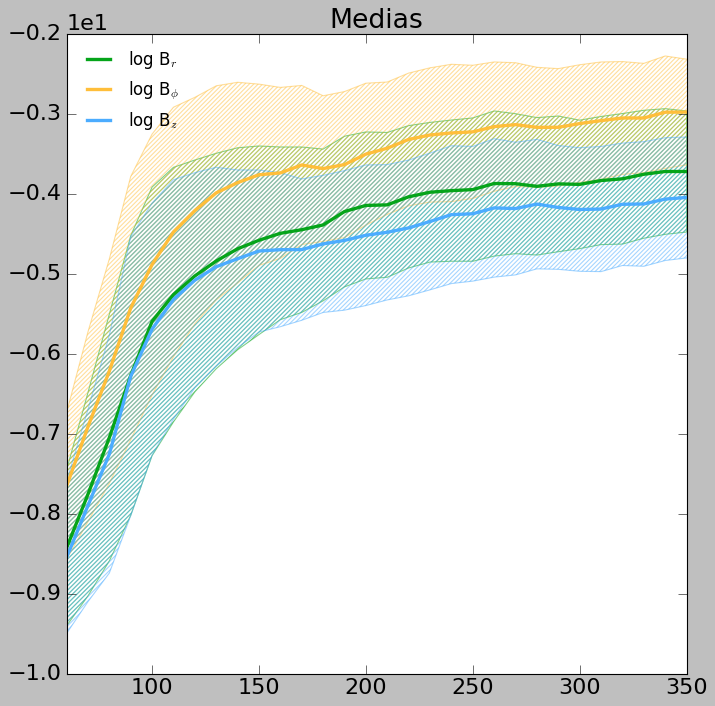

In [94]:
plt.figure(figsize=(10,10))
plt.plot(time,ltmediabr,label='log B$_r$', color=c3)
plt.fill_between(time,ltmediabr-ltsigmabr,ltmediabr+ltsigmabr,edgecolor=c3,hatch='//////',facecolor='none',alpha=0.5)
plt.plot(time,ltmediabphi,label=r'log B$_{\phi}$', color=c1)
plt.fill_between(time,ltmediabphi-ltsigmabphi,ltmediabphi+ltsigmabphi,edgecolor=c1,hatch='//////',facecolor='none',alpha=0.5)
plt.plot(time,ltmediabz,label='log B$_z$',color=c2)
plt.fill_between(time,ltmediabz-ltsigmabz,ltmediabz+ltsigmabz,edgecolor=c2,hatch='//////',facecolor='none',alpha=0.5)
plt.legend(loc='upper left', frameon=False)
plt.title('Medias')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlim(60,350)
plt.savefig(path_save+'disco/componentes_log_B_medias_vs_t.pdf', format='pdf', dpi=1500,bbox_inches='tight')
plt.show()

In [29]:
sgz

array([], dtype=float32)

In [16]:
sgmass.min(),sgmass.max()

(1e-07, 1e-07)